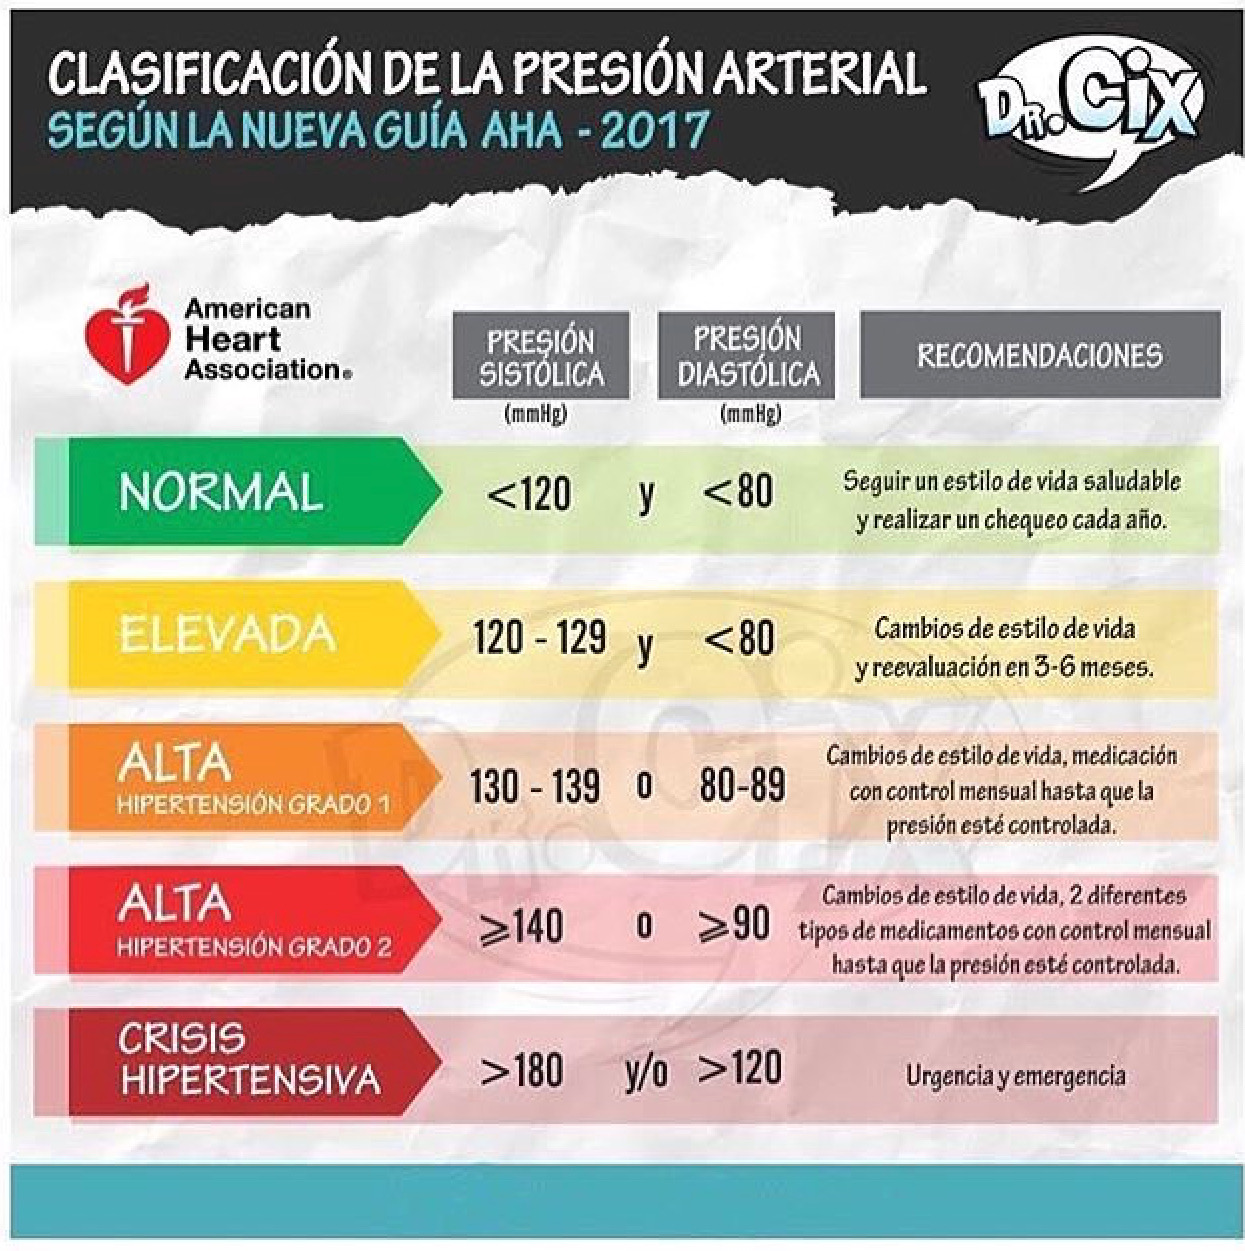

Tenemos 2 variables de entrada y 1 de salida </br>
V1. Presion sistolica</br>
V2. Presion diastolica</br>
S1. Clasificacion

In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy  as fuzz
import matplotlib.pyplot as plt

In [ ]:
#Funciones de pertenencia para presion sistolica
def f_pert_ps_normal(p_sistolica):
    centro=120
    ancho=-1
    return fuzz.sigmf(p_sistolica,centro,ancho)

def f_pert_ps_elevada(p_sistolica):
    μ=125
    σ=5
    return fuzz.gaussmf(p_sistolica,μ,σ)

def f_pert_ps_alta1(p_sistolica):
    μ=135
    σ=5
    return fuzz.gaussmf(p_sistolica,μ,σ)

def f_pert_ps_alta2(p_sistolica):
    μ=160
    σ=20
    b=9
    return fuzz.gbellmf(p_sistolica,σ,b,μ)

def f_pert_ps_crisis(p_sistolica):
    centro=178
    ancho=1
    return fuzz.sigmf(p_sistolica,centro,ancho)
#-------------------------------------------------------------------
#Funciones de pertenencia para presion diastolica
def f_pert_pd_normal(p_diastolica):
    centro=82
    ancho=-1
    return fuzz.sigmf(p_diastolica,centro,ancho) ######

def f_pert_pd_alta1(p_diastolica):
    μ=85
    σ=6
    return fuzz.gaussmf(p_diastolica,μ,σ)

def f_pert_pd_alta2(p_diastolica):
    μ=110
    σ=20
    b=9
    return fuzz.gbellmf(p_diastolica,σ,b,μ)

def f_pert_pd_crisis(p_diastolica):
    centro=120
    ancho=1
    return fuzz.sigmf(p_diastolica,centro,ancho)

Asignamos un rango a las 3 variables

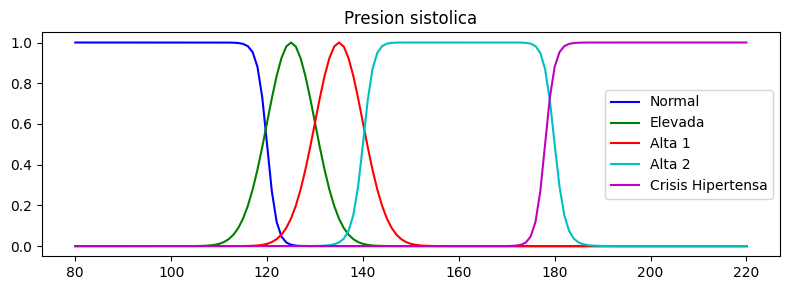

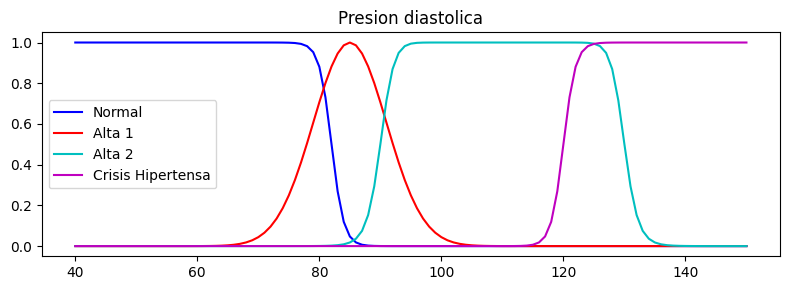

In [ ]:

p_sistolica = np.arange(80, 220+1, 1)
p_diastolica = np.arange(40, 150+1, 1)

ps_f_pert_normal=f_pert_ps_normal(p_sistolica)
ps_f_pert_elevada=f_pert_ps_elevada(p_sistolica)
ps_f_pert_alta1=f_pert_ps_alta1(p_sistolica)#OR
ps_f_pert_alta2=f_pert_ps_alta2(p_sistolica)#OR
ps_f_pert_crisis=f_pert_ps_crisis(p_sistolica)#OR

pd_f_pert_normal=f_pert_pd_normal(p_diastolica)
pd_f_pert_alta1=f_pert_pd_alta1(p_diastolica)
pd_f_pert_alta2=f_pert_pd_alta2(p_diastolica)#OR
pd_f_pert_crisis=f_pert_pd_crisis(p_diastolica)#OR

salida_normal=1
salida_elevada=1
salida_alta1=1
salida_alta2=1
salida_crisis=1

fig, ax1 = plt.subplots(figsize=(8, 3))
ax1.plot(p_sistolica, ps_f_pert_normal, 'b', linewidth=1.5, label='Normal')
ax1.plot(p_sistolica, ps_f_pert_elevada, 'g', linewidth=1.5, label='Elevada')
ax1.plot(p_sistolica, ps_f_pert_alta1, 'r', linewidth=1.5, label='Alta 1')
ax1.plot(p_sistolica, ps_f_pert_alta2, 'c', linewidth=1.5, label='Alta 2')
ax1.plot(p_sistolica, ps_f_pert_crisis, 'm', linewidth=1.5, label='Crisis Hipertensa')
ax1.set_title("Presion sistolica")
ax1.legend()
plt.tight_layout()
plt.show(block=False)


fig, ax1 = plt.subplots(figsize=(8, 3))
ax1.plot(p_diastolica, pd_f_pert_normal, 'b', linewidth=1.5, label='Normal')
ax1.plot(p_diastolica, pd_f_pert_alta1, 'r', linewidth=1.5, label='Alta 1')
ax1.plot(p_diastolica, pd_f_pert_alta2, 'c', linewidth=1.5, label='Alta 2')
ax1.plot(p_diastolica, pd_f_pert_crisis, 'm', linewidth=1.5, label='Crisis Hipertensa')
ax1.set_title("Presion diastolica")
ax1.legend()
plt.tight_layout()
plt.show(block=False)


Calculamos los valores de verdad para una cierta entrada


In [ ]:
#Entrada
presion_sistolica=140
presion_diastolica=100

#Valores de verdad
ps_in_normal = fuzz.interp_membership(p_sistolica, ps_f_pert_normal, presion_sistolica)
ps_in_elevada = fuzz.interp_membership(p_sistolica, ps_f_pert_elevada, presion_sistolica)
ps_in_alta1 = fuzz.interp_membership(p_sistolica, ps_f_pert_alta1, presion_sistolica)
ps_in_alta2 = fuzz.interp_membership(p_sistolica, ps_f_pert_alta2, presion_sistolica)
ps_in_crisis = fuzz.interp_membership(p_sistolica, ps_f_pert_crisis, presion_sistolica)

pd_in_normal = fuzz.interp_membership(p_diastolica, pd_f_pert_normal, presion_diastolica)
pd_in_alta1 = fuzz.interp_membership(p_diastolica, pd_f_pert_alta1, presion_diastolica)
pd_in_alta2 = fuzz.interp_membership(p_diastolica, pd_f_pert_alta2, presion_diastolica)
pd_in_crisis = fuzz.interp_membership(p_diastolica, pd_f_pert_crisis, presion_diastolica)


Activacion de los predicados

In [ ]:
activacion_regla1=np.fmin(ps_in_normal,pd_in_normal)
activacion_regla2=np.fmin(ps_in_elevada,pd_in_normal)
activacion_regla3=np.fmax(ps_in_alta1,pd_in_alta1)
activacion_regla4=np.fmax(ps_in_alta2,pd_in_alta2)
activacion_regla5=np.fmax(ps_in_crisis,pd_in_crisis)

Activacion de los consecuentes

In [ ]:
clasificacion_activation_normal = np.fmin(activacion_regla1, salida_normal)
clasificacion_activation_elevada= np.fmin(activacion_regla2, salida_elevada)
clasificacion_activation_alta1= np.fmin(activacion_regla3, salida_alta1)
clasificacion_activation_alta2= np.fmin(activacion_regla4, salida_alta2)
clasificacion_activation_crisis= np.fmin(activacion_regla5, salida_crisis)

2.0611536181902037e-09


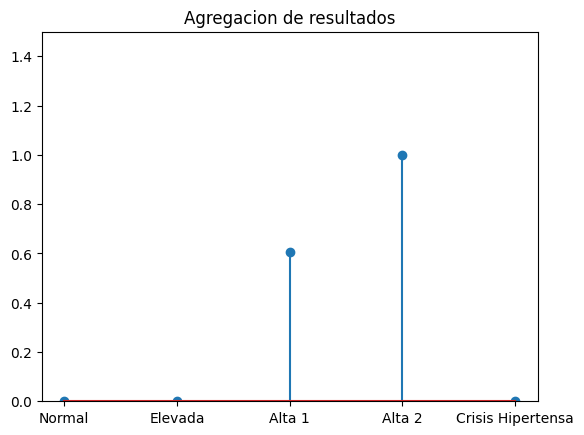

In [ ]:
# Datos
categorias = ["Normal", "Elevada", "Alta 1", "Alta 2", "Crisis Hipertensa"]
valores = [clasificacion_activation_normal, clasificacion_activation_elevada, clasificacion_activation_alta1,clasificacion_activation_alta2,clasificacion_activation_crisis]
colores = ["blue", "orange", "green","red","brown","purple"]

# Crear gráfico tipo "stem" (palitos con puntos)
(markerline, stemlines, baseline) = plt.stem(categorias, valores)

# Configuración
plt.title("Agregacion de resultados")
plt.ylim(0, 1.5)

plt.show()
